In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec

sns.set_style('ticks')

In [3]:
run -i data_prep.py

In [4]:
# * Import all the data needed for the plots

capacity_additions = pd.read_pickle('Data_for_Figures//capacity_additions.pkl')

capacity_outflows = pd.read_pickle('Data_for_Figures//capacity_outflows.pkl')

material_additions = pd.read_pickle('Data_for_Figures//material_additions.pkl')

material_outflows = pd.read_pickle('Data_for_Figures//material_outflows.pkl')

CAPEX = pd.read_pickle('Data_for_Figures//CAPEX.pkl')

employment = pd.read_pickle('Data_for_Figures//employment.pkl')

chemistries = pd.read_pickle('Data_for_Figures//chemistries.pkl')

material_content_BEV = pd.read_pickle('Data_for_Figures//material_content_BEV.pkl')

material_content_PHEV = pd.read_pickle('Data_for_Figures//material_content_PHEV.pkl')

material_additions_historical = pd.read_pickle('Data_for_Figures//material_additions_historical.pkl')

capacity_additions_historical = pd.read_pickle('Data_for_Figures//capacity_additions_historical.pkl')

materials_inflows_industries = pd.read_pickle('Data_for_Figures//materials_inflows_industries.pkl')

production_capacity = pd.read_excel('BEVs_LIB_CAPEX_employment stats.xlsx', sheet_name = 'Production capacity', skiprows = 4, nrows = 4, usecols = 'C:R')


## Create Dataframe with mining rates of different materials. Data based on USGS 

In [6]:
mining_rate_2019 = pd.DataFrame(data = [144000000,1100000000,82000000])
mining_rate_2019 = mining_rate_2019.transpose()
mining_rate_2019.columns = ['Co','Graphite','Li']

mining_rate_2025 = pd.DataFrame(data = [250000000,155000000])
mining_rate_2025 = mining_rate_2025.transpose()
mining_rate_2025.columns = ['Co','Li']


In [7]:
for i in range(len(capacity_additions)):
    capacity_outflows[i] = capacity_outflows[i].groupby('chemistry').sum()
    capacity_additions[i] = capacity_additions[i].groupby('chemistry').sum()

## Create colormap

In [8]:
col1 = np.array([169/256, 169/ 256, 169/256, 1])
my_map = LinearSegmentedColormap.from_list('paired',colors=[ col1,'xkcd:dull blue','xkcd:asparagus',
                                                           'xkcd:light orange',
                                                            'xkcd:reddish','xkcd:light eggplant','xkcd:sandy','xkcd:burgundy'], N=8)


# Plot chemistries scenario 

## Plot

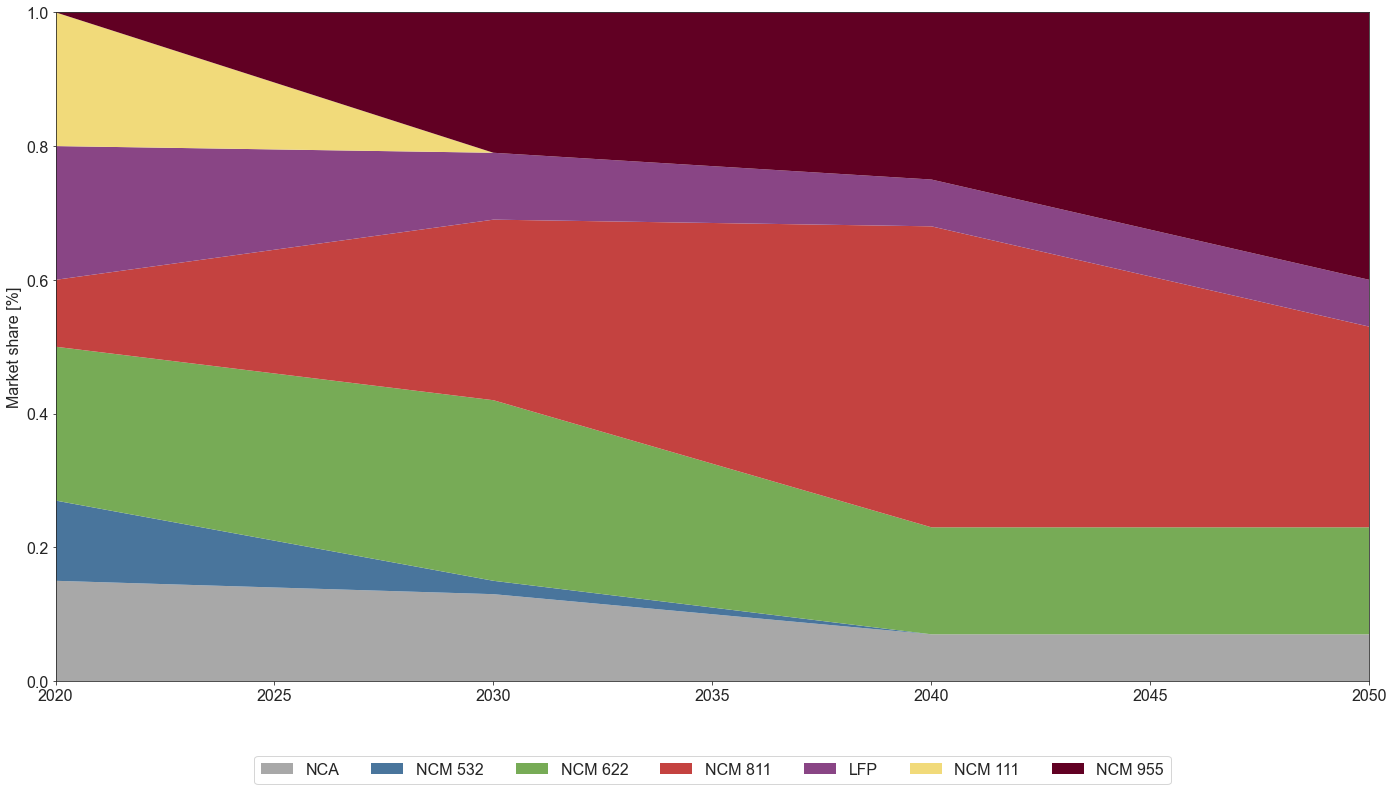

In [9]:
inter = chemistries.copy().transpose()
inter.drop('Li-S', axis = 1, inplace = True)
inter.plot.area(cmap = my_map,figsize =(19.2,11), fontsize = 16, linewidth = 0)
#plt.legend(bbox_to_anchor = (1,1))
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=8, fontsize = 16)

plt.ylim(0,1)
plt.xlim(2020,2050)
plt.tight_layout()
plt.ylabel('Market share [%]', fontsize = 16 )

#plt.savefig('Figures//chemistries_scenario.jpeg', dpi = 600, pad_inches = 10)
plt.show()

## Plot survival rate distribution for vehicles entering the stock at year x

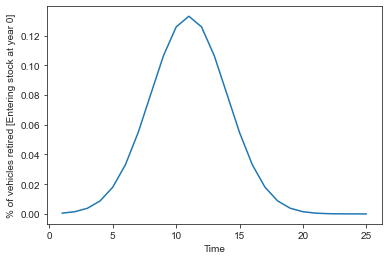

In [10]:
mu = 11
sigma = 3
x = np.linspace(1, 25, 25)
#y = np.linspace(mu-5*sigma, mu+4*sigma, 15)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.ylabel('% of vehicles retired [Entering stock at year 0]')
plt.xlabel('Time')
#plt.savefig('Retirement curves.jpg', dpi = 600)
plt.show()


## Convert capacity flows from kWh to TWh. 
## Convert material flows from kg to Mt (mega-tonnes)

In [11]:
mining_rate_2019 = mining_rate_2019.div(1e9)
mining_rate_2025 = mining_rate_2025.div(1e9)

for i in range(len(material_additions)):
    material_additions[i] = material_additions[i].div(1e9)
    material_outflows[i] = material_outflows[i].div(1e9)
    capacity_additions[i] = capacity_additions[i].div(1e9)
    capacity_outflows[i] = capacity_outflows[i].div(1e9)


# Create Dataframe with EVs additions to stock(based on scenarios) in the period 2015-2020

## Create DataFrame with historical material demand for relevant industrial sector for further comparison

In [12]:
scenarios_2015_2020 = [None]*len(material_additions)
materials_addition_all = [None]*int(len(material_additions))
material_additions_historical = material_additions_historical.div(1e9)

for i in range(len(material_additions)):
    scenarios_2015_2020[i] = material_additions[i].loc[:,2016:2020]
    materials_addition_all[i] = material_additions[i].loc[:,2020:2050]

for i in range(len(materials_inflows_industries)):
    materials_addition_all.append(materials_inflows_industries[i])

len(materials_addition_all)

11

# Plot Cobalt, Lithium and Graphite flows 

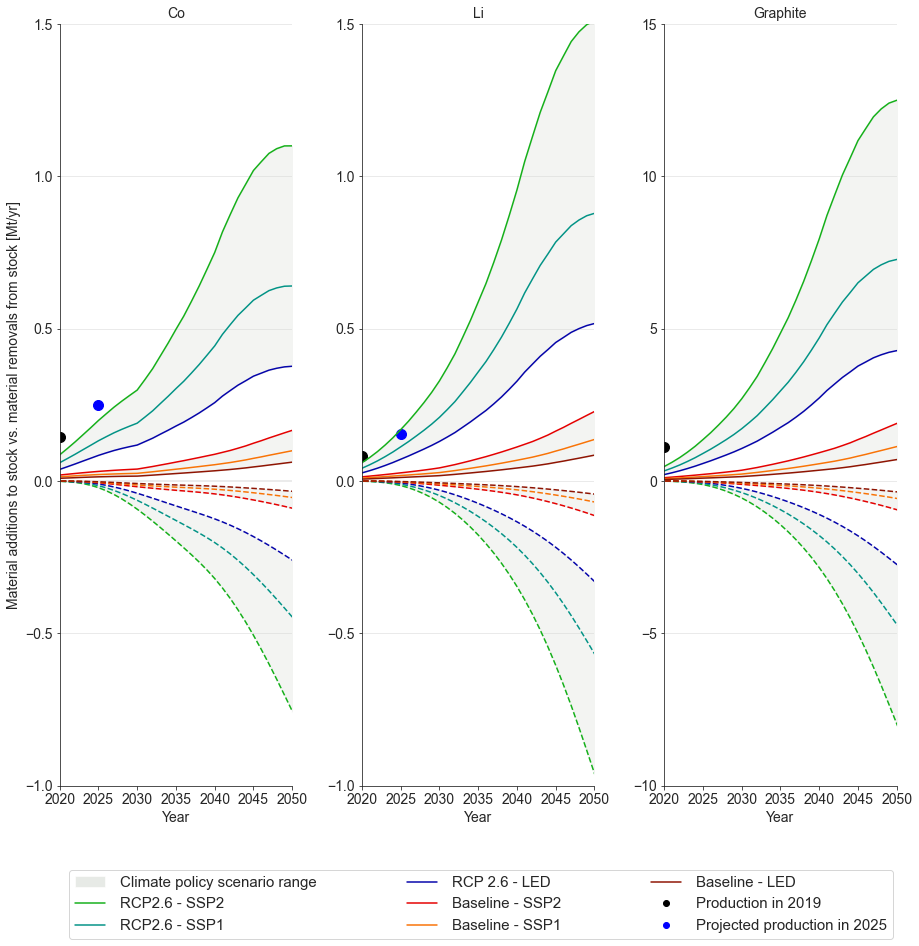

In [13]:
col_background = ['#d8dcd6']

linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402']

customp = sns.set_palette(sns.color_palette(linecols))


fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,15), gridspec_kw={'wspace': .3})

ax[0].axis (True)

ax[0].set_ylim(-1,1.5)
ax[1].set_ylim(-1,1.5)
ax[2].set_ylim(-10,15)

ax[0].set_ylabel('Material additions to stock vs. material removals from stock [Mt/yr]', size = 'x-large')

x = material_additions[0].columns.values
x = np.array(x, dtype = int)

materials_to_plot = ['Co','Li','Graphite']
ncols = 3

for i, k in zip(range(len(materials_to_plot)), materials_to_plot): 
  for j in range(len(material_additions)):
    y = material_additions[j].loc[k]
    ax[i].plot(x,y, linecols[j])
    
    y = material_outflows[j].loc[:,2015:2060].loc[k].mul(-1)
    ax[i].plot(x,y, linecols[j], linestyle = 'dashed')

  ax[i].set_title(f'{materials_to_plot[i]}')
  ax[i].set_xlim(2020,2050)
  ax[i].yaxis.grid(color = 'black', alpha = 0.1)
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].set_xlabel('Year')

  for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
              ax[i].get_xticklabels() + ax[i].get_yticklabels()):
      item.set_fontsize(14)

  ax[i].fill_between(
    x,
    material_additions[0].loc[k],
    material_additions[2].loc[k], 
    color = col_background,
    alpha = 0.3,
    interpolate = True
    )

  ax[i].fill_between(x,
    material_additions[3].loc[k],
    material_additions[5].loc[k],
    color = col_background,
    alpha = 0.3,
    interpolate = True
    )

  ax[i].fill_between(
    x,
    material_outflows[0].loc[:,2015:2060].loc[k].mul(-1), 
    material_outflows[2].loc[:,2015:2060].loc[k].mul(-1), 
    color = col_background, 
    alpha = 0.3, 
    interpolate = True
    )

  ax[i].fill_between(
    x, 
    material_outflows[3].loc[:,2015:2060].loc[k].mul(-1),
    material_outflows[5].loc[:,2015:2060].loc[k].mul(-1),
    color = col_background,
    alpha = 0.3,
    interpolate = True
    )

  ax[i].scatter(2020, mining_rate_2019[k], color = 'black', s = 100)
  if k != 'Graphite':
    ax[i].scatter(2025, mining_rate_2025[k], color = 'blue', s = 100)
  else: 
    break


line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
scat2 =  mlines.Line2D([], [], color = 'black', marker = '.', linestyle = '', label='Production in 2019')
scat3 =  mlines.Line2D([], [], color = 'blue', marker = '.', linestyle = '', label='Projected production in 2025')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')

lines = [range_int, line1,line2,line3, line4, line5, line6, scat2, scat3]
plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.515, 0.065),
              borderaxespad=0.1, handletextpad=1., columnspacing=6,
              fontsize=15, frameon=True, ncol= 3, markerscale = 2)

gridlines = ax[0].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)


#plt.savefig('Figures//Figure2_key_materials_flow.jpg', dpi = 600,bbox_inches='tight')

In [14]:
years_columns = material_outflows[0].columns.values
years_columns = np.array(years_columns, dtype = 'int')


In [23]:
outflows_changed_years = [None]*len(material_outflows)
for i in range(len(material_outflows)):
    outflows_changed_years[i] = material_outflows[i].copy()
    outflows_changed_years[i].columns = years_columns+1

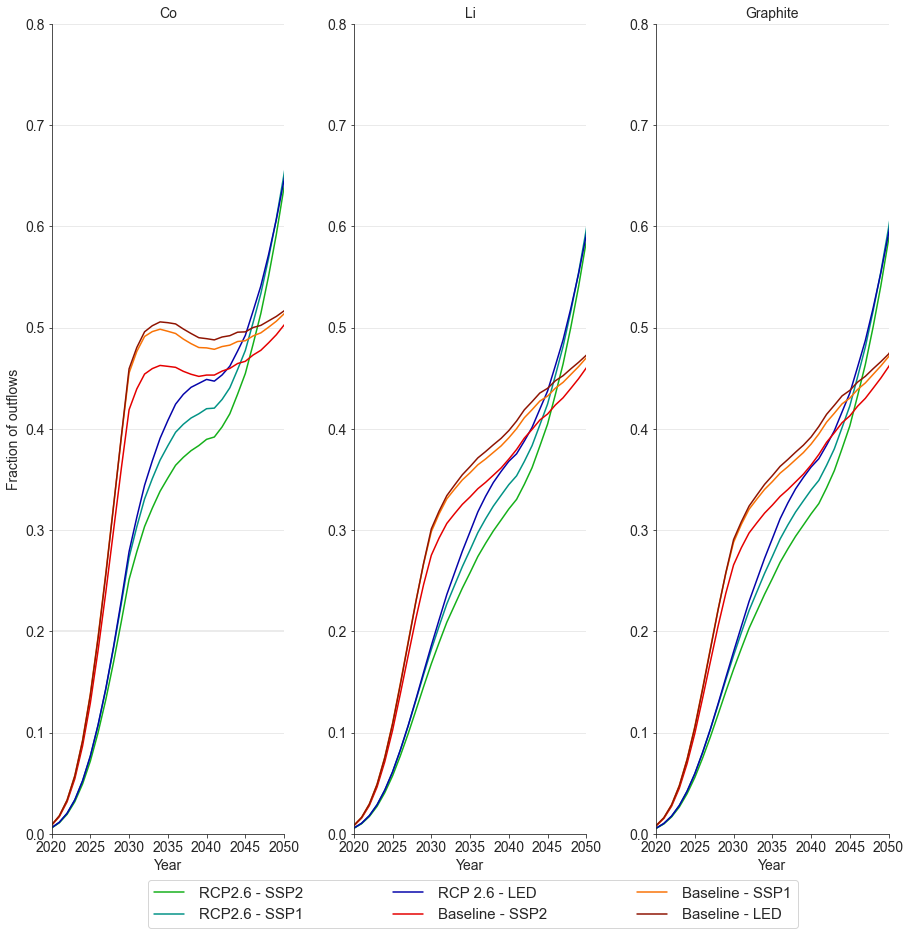

In [26]:
col_background = ['#d8dcd6']

linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402']

customp = sns.set_palette(sns.color_palette(linecols))


fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,15), gridspec_kw={'wspace': .3})

ax[0].axis (True)

ax[0].set_ylim(0, .8)
ax[1].set_ylim(0, .8)
ax[2].set_ylim(0, .8)

ax[0].set_ylabel('Fraction of outflows', size = 'x-large')

x = material_additions[0].columns.values
x = np.array(x, dtype = int)

materials_to_plot = ['Co','Li','Graphite']
ncols = 3


for i, k in zip(range(len(materials_to_plot)), materials_to_plot): 
  for j in range(len(material_additions)):
    y = outflows_changed_years[j].loc[:,2020:2060].loc[k].div(material_additions[j].loc[k])
    ax[i].plot(x,y, linecols[j])

  ax[i].set_title(f'{materials_to_plot[i]}')
  ax[i].set_xlim(2020,2050)
  ax[i].yaxis.grid(color = 'black', alpha = 0.1)
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].set_xlabel('Year')

  for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
              ax[i].get_xticklabels() + ax[i].get_yticklabels()):
      item.set_fontsize(14)
      
line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')


lines = [line1,line2,line3, line4, line5, line6]
plt.subplots_adjust(bottom=0.13)  # make extra room under figure for legend

fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.515, 0.065),
              borderaxespad=0.1, handletextpad=1., columnspacing=6,
              fontsize=15, frameon=True, ncol= 3, markerscale = 2)

gridlines = ax[0].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)


#plt.savefig('Figures//AdditionalFigure_Ratio_of_outflows_inflows.jpg', dpi = 600,bbox_inches='tight')

# Plot EVs inflows and outflows in each scenario 

## Primary y-axis --> Capacity flows in TWh

## Secondary y-axis --> Material flows in Mt

0


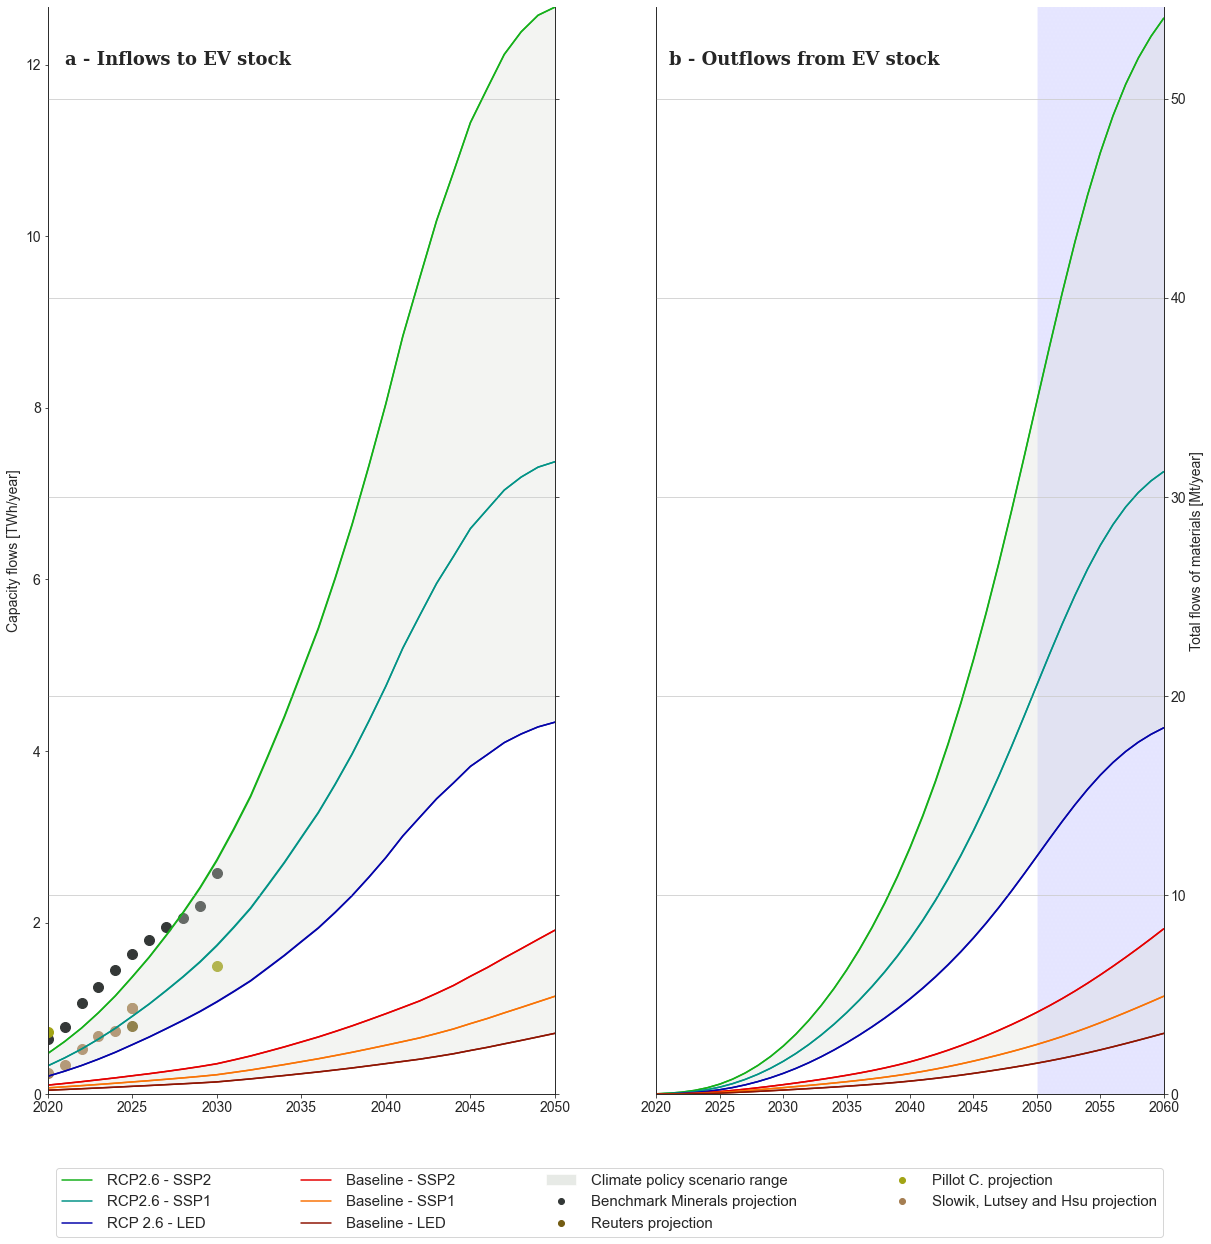

In [18]:
fig, ax = plt.subplots(figsize=(20,20), nrows = 1, ncols=2)

col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402']
cols_scat = ['#343837','#735c12','#a2a415','#a57e52']


nplots = 2

for i in range(nplots):
  if i == 0:
    print(i)
    ax2 = ax[i].twinx()
    ax[i].spines['top'].set_visible(False)
    ax2.grid(None)
    ax2.spines['top'].set_visible(False)
    ax2.axes.yaxis.set_ticklabels([])

    ax[i].set_ylim(0,capacity_additions[0][2050].sum(axis =0))
    ax2.set_ylim(0,material_additions[0][2050].sum(axis = 0))

    for k in range(len(material_additions)):
      x = capacity_additions[0].columns.values[5:36]
      x = np.array(x, dtype = 'int')
      y = capacity_additions[k].sum(axis = 0)[5:36]
      ax[i].plot(x, y, color = linecols[k])
      y = material_additions[k].sum(axis = 0)[5:36]
      ax2.plot(x, y, color = linecols[k])
    for l in range(4):
      yscat = production_capacity.loc[:,2020:].divide(1e3).loc[l]
      xscat = production_capacity.loc[:,2020:].columns.values
      ax[i].scatter(xscat, yscat, color = cols_scat[l], s = 100)

    ax[i].set_ylabel('Capacity flows [TWh/year]', fontsize = 14)
    ax[i].text(2021, 12, 'a - Inflows to EV stock', fontsize = 18, fontfamily = 'serif', fontweight = 'bold')
    ax[i].set()
    ax[i].set_xlim(2020,2050)

    ax[i].fill_between(
    x,
    capacity_additions[0].loc[:,2020:2050].sum(axis = 0), 
    capacity_additions[2].loc[:,2020:2050].sum(axis = 0), 
    color = col_background, 
    alpha = 0.3, 
    )

    ax[i].fill_between(
    x,
    capacity_additions[3].loc[:,2020:2050].sum(axis = 0), 
    capacity_additions[5].loc[:,2020:2050].sum(axis = 0), 
    color = col_background, 
    alpha = 0.3, 
    )

  else:
    x = capacity_outflows[0].columns.values[5:46]
    x = np.array(x, dtype = 'int')
    ax2 = ax[i].twinx()
    ax2.set_ylabel('Total flows of materials [Mt/year]', fontsize = 14)

    for k in range(len(material_outflows)):
      y = capacity_outflows[k].sum(axis = 0)[5:46]
      ax[i].plot(x, y, color = linecols[k])      
      y = material_outflows[k].sum(axis = 0)[5:46]
      ax2.plot(x,y, color = linecols[k])
      #ax2.grid(None)

    ax[i].spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    #ax2.axes.yaxis.set_ticklabels([])
    ax[i].set_ylim(0,capacity_additions[0][2050].sum(axis =0))
    ax2.set_ylim(0,material_additions[0][2050].sum(axis = 0))
    ax2.tick_params(labelsize = 14)
    ax[i].set_xlim(2020,2060)
    ax[i].legend_ = None
    ax[i].set_yticks([])

    ax[i].fill_between([2050,2060],[0,0],[13,13],facecolor='blue',
                  alpha=0.1, hatch='...',edgecolor='w',zorder=1)
    ax[i].text(2021, 12, 'b - Outflows from EV stock', fontsize = 18, fontfamily = 'serif', fontweight = 'bold')
    ax[i].fill_between(
    x,
    capacity_outflows[0].loc[:,2020:2060].sum(axis = 0), 
    capacity_outflows[2].loc[:,2020:2060].sum(axis = 0), 
    color = col_background, 
    alpha = 0.3, 
    )

    ax[i].fill_between(
    x,
    capacity_outflows[3].loc[:,2020:2060].sum(axis = 0), 
    capacity_outflows[5].loc[:,2020:2060].sum(axis = 0), 
    color = col_background, 
    alpha = 0.3, 
    )


  for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
              ax[i].get_xticklabels() + ax[i].get_yticklabels()):
      item.set_fontsize(14)


ax2.grid(None)

ax[1].set_xlim(2020,2060)
ax[1].legend_ = None




######### LEGEND ################

line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')


scat1 =  mlines.Line2D([], [], color = cols_scat[0], marker = '.', linestyle = '', label='Benchmark Minerals projection')
scat2 =  mlines.Line2D([], [], color = cols_scat[1], marker = '.', linestyle = '', label='Reuters projection')
scat3 =  mlines.Line2D([], [], color = cols_scat[2], marker = '.', linestyle = '', label='Pillot C. projection')
scat4 =  mlines.Line2D([], [], color = cols_scat[3], marker = '.', linestyle = '', label='Slowik, Lutsey and Hsu projection')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')

lines = [line1,line2,line3, line4, line5, line6,range_int, scat1,scat2,scat3,scat4]

fig.legend(
  handles=lines,
  loc='center',
  bbox_to_anchor=(0.515, .05), 
  borderaxespad=0.1, 
  handletextpad=1., 
  columnspacing=6,
  fontsize=15, 
  frameon=True, 
  ncol= 4, 
  markerscale = 2
  )


#plt.savefig('Figures//Figure1__Inflows and outflows_capacity&materials.jpg', dpi = 600, bbox_inches = 'tight')


## Plot cumulative CAPEX required for the installation of LIB production facilities in each scenario  

(0.0, 350.0)

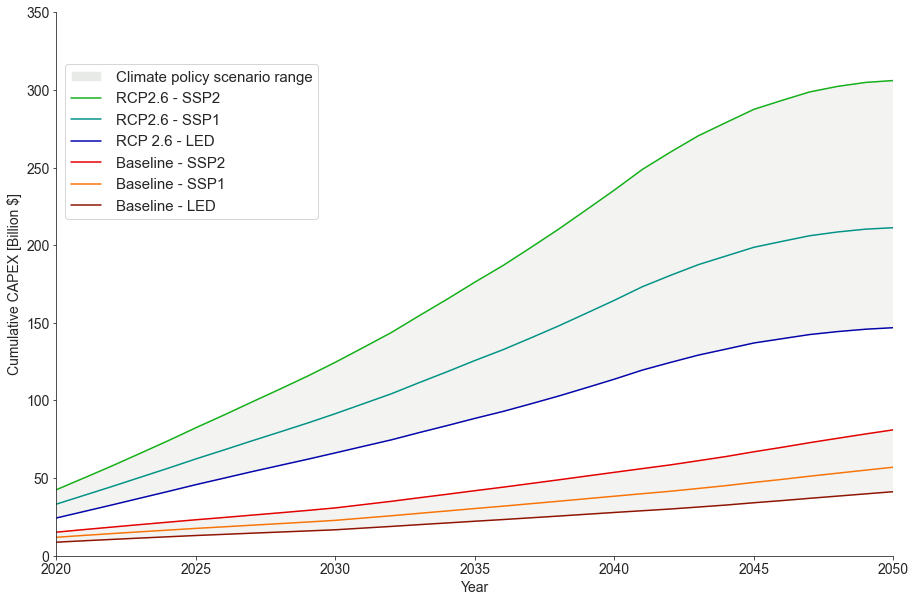

In [19]:
col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402']

customp = sns.set_palette(sns.color_palette(linecols))

fig, ax = plt.subplots(figsize = (15,10))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(2020,2050)
ax.set_ylabel('Cumulative CAPEX [Billion $]', size = 'x-large')
ax.set_xlabel('Year', size = 'x-large')


x = CAPEX[0].index.values
x = np.array(x, dtype = 'float')

for i in range(len(CAPEX)):
  y = CAPEX[i].cumsum(axis = 0).div(1e3)
  ax.plot(x,y, color = linecols[i])

ax.fill_between(x, CAPEX[0].cumsum(axis =0).div(1e3), CAPEX[2].cumsum(axis =0).div(1e3), color = col_background, alpha = .3)
ax.fill_between(x, CAPEX[3].cumsum(axis =0).div(1e3), CAPEX[5].div(1e3).cumsum(axis =0), color = col_background, alpha = .3)

ax.legend_= None

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
  ax.get_xticklabels() + ax.get_yticklabels()):
  item.set_fontsize(14)

line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')

lines = [range_int, line1,line2,line3, line4, line5, line6]

fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.25, .7),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 1)


ax.set_ylim(0,350)

#plt.savefig('Figures//Figure3__CAPEX_cumulative.jpg', dpi = 600, bbox_inches = 'tight')

## Plot the demand of materials in all scenarios and comparison of various benchmark sectors. 
### Additionally, plot material inflows from 2015 to 2020 due to EVs sales (based on records)

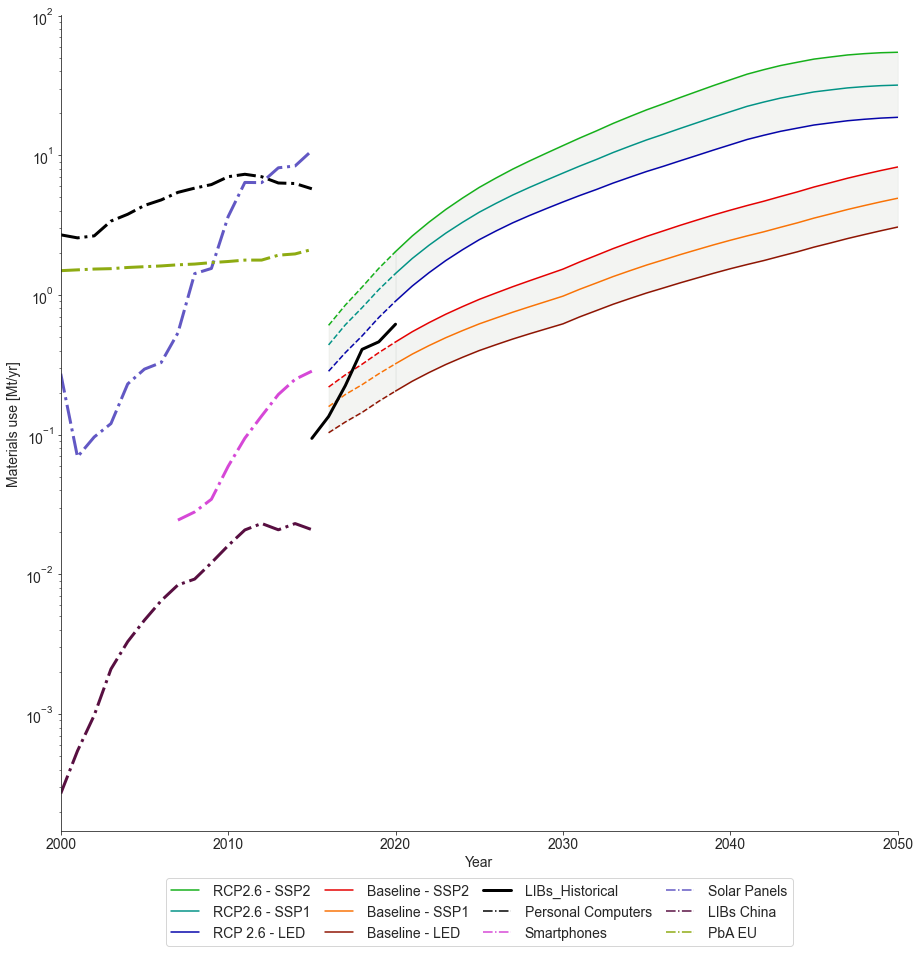

In [20]:
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402','#000000','#d648d7','#6258c4','#580f41','#8eab12','#000000']
col_background = ['#d8dcd6']



fig, ax = plt.subplots(figsize = (15,15))
for i in range(len(materials_addition_all)):
    if i <= 5:
        y = materials_addition_all[i].sum(axis = 0)
        x = materials_addition_all[0].columns.values
        ax.plot(x, y, color = linecols[i])
        y = scenarios_2015_2020[i].sum(axis = 0)
        x = scenarios_2015_2020[i].columns.values
        ax.plot(x,y, color = linecols[i], linestyle = ('--'))
    elif i> 5: 
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i], linestyle=('-.'), linewidth = 3)

y = material_additions_historical.sum(axis = 0)
x = material_additions_historical.columns.values
ax.plot(x, y, color = linecols[11], linewidth = 3)

ax.fill_between(x = materials_addition_all[0].columns.values, y1 = materials_addition_all[0].sum(axis = 0), y2 = materials_addition_all[2].sum(axis = 0),color = col_background, alpha = .3)
ax.fill_between(x = materials_addition_all[0].columns.values, y1 = materials_addition_all[3].sum(axis = 0), y2 = materials_addition_all[5].sum(axis = 0),color = col_background, alpha = .3)

ax.fill_between(x = scenarios_2015_2020[0].columns.values, y1 = scenarios_2015_2020[0].sum(axis = 0), y2 = scenarios_2015_2020[2].sum(axis = 0),color = col_background, alpha = .3)
ax.fill_between(x = scenarios_2015_2020[0].columns.values, y1 = scenarios_2015_2020[3].sum(axis = 0), y2 = scenarios_2015_2020[5].sum(axis = 0),color = col_background, alpha = .3)


ax.set_yscale('log')
ax.set_ylabel('Materials use [Mt/yr]', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

ax.set_xlim(2000,2050)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize = 14)


##### LEGEND #####
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
line12 =  mlines.Line2D([], [], color = linecols[6], label='LIBs_Historical', linewidth = 3)
line7 =  mlines.Line2D([], [], color = linecols[6], label='Personal Computers', linestyle = ('-.'))
line8 =  mlines.Line2D([], [], color = linecols[7], label='Smartphones', linestyle = ('-.'))
line9 =  mlines.Line2D([], [], color = linecols[8], label='Solar Panels', linestyle = ('-.'))
line10 =  mlines.Line2D([], [], color = linecols[9], label='LIBs China', linestyle = ('-.'))
line11 =  mlines.Line2D([], [], color = linecols[10], label='PbA EU', linestyle = ('-.'))

lines = [line1,line2,line3,line4,line5,line6,line12,line7,line8,line9,line10,line11]

ax.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.1 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=14, frameon=True, ncol = 4, markerscale = 2)
#plt.savefig('Figures//Figure5__Reference techs_mat demand over time_LIBs EVs historical.jpg', bbox_inches = 'tight', dpi = 600)

## Plot employment generated yearly, in LIB production facilities, due to the demand of LIBs that requires the addition of new production facilities

(0.0, 75000.0)

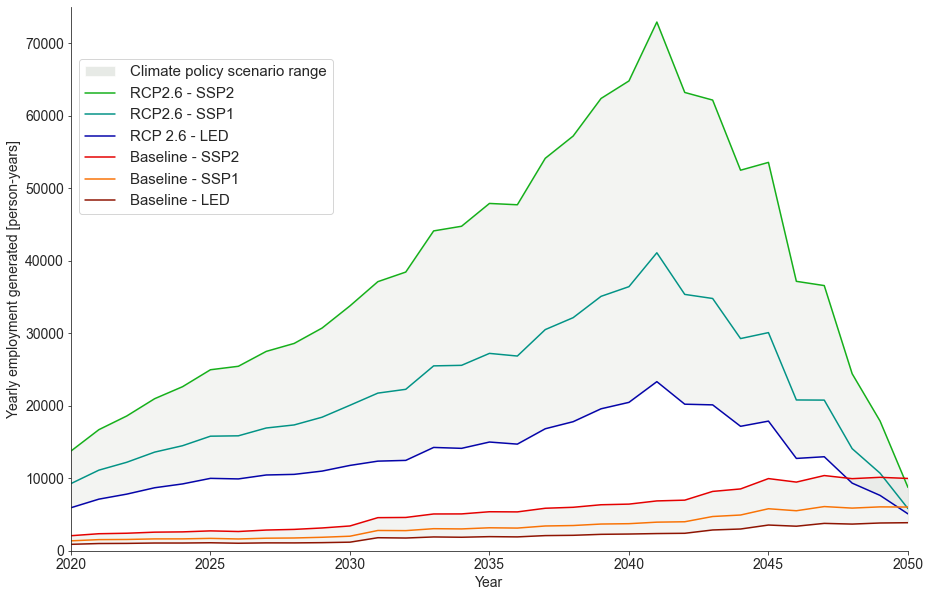

In [21]:
col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402']

customp = sns.set_palette(sns.color_palette(linecols))

fig, ax = plt.subplots(figsize = (15,10))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(2020,2050)
ax.set_ylabel('Yearly employment generated [person-years]', size = 'x-large')
ax.set_xlabel('Year', size = 'x-large')


x = employment[0].columns.values
x = np.array(x, dtype = 'int')

for i in range(len(employment)):
  y = employment[i].sum(axis = 0)
  ax.plot(x,y, color = linecols[i])

ax.fill_between(x, employment[0].sum(axis = 0), employment[2].sum(axis = 0), color = col_background, alpha = .3)
ax.fill_between(x, employment[3].sum(axis = 0), employment[5].sum(axis = 0), color = col_background, alpha = .3)

ax.legend_= None

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
  ax.get_xticklabels() + ax.get_yticklabels()):
  item.set_fontsize(14)

line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')

lines = [range_int, line1,line2,line3, line4, line5, line6]

fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.25, .7),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 1)
ax.set_ylim(0,75000)


#plt.savefig('Figures//Figure4__Yearly employment generation.jpg', bbox_inches = 'tight', dpi = 600)